In [58]:
from bs4 import BeautifulSoup # Python으로 HTML을 다루는 기능
import requests # 페이지 요청
import pandas as pd
import time
import random
from tqdm import tqdm

In [100]:
dic = {'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 13_5_2)'}
url1 = requests.get('https://www.melon.com/genre/song_list.htm#params%5BgnrCode%5D=GN0100&params%5BdtlGnrCode%5D=&params%5BorderBy%5D=NEW&params%5BsteadyYn%5D=N&po=pageObj&startIndex=1', headers=dic)
url2 = requests.get('https://www.melon.com/song/detail.htm?songId=36831238', headers=dic)

In [101]:
html1 = BeautifulSoup(url1.text)
html2 = BeautifulSoup(url2.text)
html1, html2


(<!DOCTYPE html>
 <html lang="ko">
 <head>
 <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
 <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
 <title>장르음악&gt;한국대중음악&gt;발라드&gt;최신곡&gt;멜론</title>
 <meta content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널" name="keywords"/>
 <meta content="No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!" name="description"/>
 <meta content="ee85ff6db1fa8f2226bcb671ecb2bcdbcffb6f8b" name="naver-site-verification"/>
 <meta content="q4tbTQhmxa4La3OdNLsNOCxrJ_WV6lUlBFrFW4-HqQc" name="google-site-verification"/>
 <meta content="357952407588971" property="fb:app_id"/>
 <meta content="Melon" property="og:title"/>
 <meta content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png" property="og:image"/>
 <meta content="음악이 필요한 순간, 멜론" property="og:description"/>
 <meta content="http://www.melon.com/genre/song_list.htm" property="og:url"/>
 <meta content="website" property="og:

In [102]:
html2

<!DOCTYPE html>
<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<!-- <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" /> -->
<title>MelOn::음악이 필요한 순간, 멜론</title>
<meta content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널" name="keywords"/>
<meta content="No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!" name="description"/>
<meta content="width=device-width" name="viewport"/>
<script src="/resource/script/web/common/jquery-1.9.1.min.js" type="text/javascript"></script>
<link href="/resource/style/web/common/melonweb_layout.css" rel="stylesheet" type="text/css"/>
<link href="/resource/style/web/common/melonweb_comm.css" rel="stylesheet" type="text/css"/>
<script>
	document.domain='melon.com';
	var melonHome = 'https://www.melon.com';

	$(function() {
		if(window.opener){
			$("body").addClass("scroll_dis");
			$("#popup_wrap").css("display", "block");
		} else {
			$("#wrap").css("display", "block");


In [104]:
pages = html1.find('tbody').find_all('a', class_ = 'btn button_icons type03 song_info')

numeric_values = [page['href'].split("'")[1] for page in pages]
numeric_values

['36835056',
 '36828748',
 '36838844',
 '36838820',
 '36838801',
 '36838787',
 '36838784',
 '36838262',
 '36837903',
 '36837565',
 '36837554',
 '36836423',
 '36832591',
 '36831238',
 '36828797',
 '36831391',
 '36831389',
 '36833541',
 '36835381',
 '36837796',
 '36828767',
 '36826449',
 '36837816',
 '36832651',
 '36832111',
 '36833531',
 '36826451',
 '36832952',
 '36833690',
 '36831397',
 '36831393',
 '36829236',
 '36837622',
 '36835548',
 '36837494',
 '36837638',
 '36837495',
 '36826426',
 '36825899',
 '36835060',
 '36830722',
 '36837799',
 '36837733',
 '36830328',
 '36836554',
 '36835239',
 '36836647',
 '36826428',
 '36837511',
 '36838317']

In [59]:
for i in tqdm(range(1, 9952, 50)):
    pages = html1.find('tbody').find_all('a', class_ = 'btn button_icons type03 song_info')
    numeric_values = [page['href'].split("'")[1] for page in pages]
    time.sleep(random.random() + 1)

  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [05:02<00:00,  1.51s/it]


In [60]:
len(numeric_values)

50

In [90]:
num_result = []
for i in tqdm(range(1, 9952, 50)):
    url1 = requests.get(f'https://www.melon.com/genre/song_list.htm#params%5BgnrCode%5D=GN0100&params%5BdtlGnrCode%5D=&params%5BorderBy%5D=NEW&params%5BsteadyYn%5D=N&po=pageObj&startIndex={i}', headers=dic)
    html1 = BeautifulSoup(url1.text)
    time.sleep(random.random() + 1)
    pages = html1.find('tbody').find_all('a', class_ = 'btn button_icons type03 song_info')

    for page in pages:
        num_result.append(page['href'].split("'")[-2])

100%|██████████| 200/200 [06:14<00:00,  1.87s/it]


In [98]:
num_result[0]

'36835056'

In [99]:
num_result[50]

'36835056'

In [91]:
len(num_result)

10000

In [107]:
import time
from selenium import webdriver
from bs4 import BeautifulSoup

# 브라우저 초기화
driver = webdriver.Chrome()

# 사용자 에이전트 설정
user_agent = "Mozilla/5.0 (Macintosh; Intel Mac OS X 13_5_2)"
headers = {'User-Agent': user_agent}

song_hrefs = []

for i in tqdm(range(1, 9952, 50)):
    url = f'https://www.melon.com/genre/song_list.htm#params%5BgnrCode%5D=GN0100&params%5BdtlGnrCode%5D=&params%5BorderBy%5D=NEW&params%5BsteadyYn%5D=N&po=pageObj&startIndex={i}'
    driver.get(url)
    time.sleep(2)

    page_source = driver.page_source

    soup = BeautifulSoup(page_source, 'html.parser')
    song_elements = soup.find_all('a', class_='btn button_icons type03 song_info')

    for song_element in song_elements:
        href = song_element['href']
        song_hrefs.append(int(href[-11:-3]))

song_hrefs

100%|██████████| 200/200 [07:51<00:00,  2.36s/it]


[36835056,
 36828748,
 36838844,
 36838820,
 36838801,
 36838787,
 36838784,
 36838262,
 36837903,
 36837565,
 36837554,
 36836423,
 36832591,
 36831238,
 36828797,
 36831391,
 36831389,
 36833541,
 36835381,
 36837796,
 36828767,
 36826449,
 36837816,
 36832651,
 36832111,
 36833531,
 36826451,
 36832952,
 36833690,
 36831397,
 36831393,
 36829236,
 36837622,
 36835548,
 36837494,
 36837638,
 36837495,
 36826426,
 36825899,
 36835060,
 36830722,
 36837799,
 36837733,
 36830328,
 36836554,
 36835239,
 36836647,
 36826428,
 36837511,
 36838317,
 36838255,
 36833895,
 36829920,
 36824870,
 36819176,
 36833281,
 36836616,
 36838416,
 36829692,
 36826511,
 36827186,
 36831239,
 36826477,
 36831440,
 36831437,
 36831420,
 36831227,
 36831225,
 36831223,
 36831221,
 36831220,
 36830913,
 36830912,
 36830844,
 36830826,
 36830100,
 36830098,
 36828914,
 36828785,
 36826475,
 36819148,
 36826053,
 36824490,
 36825548,
 36826047,
 36822690,
 36826042,
 36826054,
 36825354,
 36822716,
 36824817,

In [115]:
len(song_hrefs)

10000

In [117]:
url2 = requests.get('https://www.melon.com/song/detail.htm?songId=36835056', headers=dic)
html2 = BeautifulSoup(url2.text)

html2.find('div', class_ = 'lyric').text

'\n\t\t\t\t\t\t\t잠깐 날 떠난줄 알았는데몇날 기다려도 오지 않는 너일년이면 잊혀진단 친구의 위로가사실이 될까봐 날 불안하게해헤어지잔 말을 못해 울고 있던 너널 지키못한건 내탓이야이별을 좀 미루자잘해준게 없어 미안해곁에서도 외로웠단너의 그 눈물섞인말에내가슴은 찢어져 어떻게 헤어져잠시 미루자 이별의 끝을가끔 빈 방 안에 혼자누워펑펑 울고있을 니가 떠올라헤어지잔 말을 못해 울고 있던 너널 지키못한건 내탓이야이별을 좀 미루자잘해준게 없어 미안해곁에서도 외로웠단너의 그 눈물 섞인 말에내가슴은 찢어져 어떻게 헤어져잠시 미루자 이별의 끝을부정할 수 없는 우리 이별을잠시만 미룰수는 없을까잘해준게 하나없는 나라서그런나라서시작조차 안했다면 괜찮았을까이별을 좀 미루자잘해준게 없어 미안해곁에서도 외로웠단너의 그 눈물섞인말에내가슴은 찢어져 어떻게 헤어져잠시 미루자 이별의 끝을\n\t\t\t\t\t'

In [125]:
song_hrefs = pd.DataFrame(song_hrefs)

In [126]:
song_hrefs

,0
0,36835056
1,36828748
2,36838844
3,36838820
4,36838801
...,...
9995,34582655
9996,34582394
9997,34581438
9998,34577238


In [129]:
song_hrefs.to_csv('./song_hrefs.csv', index=False)

#### 5000개부터

In [166]:
# user = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6)'}

# with open('./song_hrefs.csv', 'r', encoding='utf-8') as rf:
#     with open('lyrics1.txt', 'w', encoding='utf-8') as wf:
#         nums = rf.readlines()[5000:]
#         for n in tqdm(nums):
#             n = n.replace('\n','')
#             sub_url = requests.get(f'https://www.melon.com/song/detail.htm?songId={n}', headers=user)
#             sub_html = BeautifulSoup(sub_url.text)

#             try:
#                 lyric = str(sub_html.find('div', class_='lyric')).replace('<br/>',' ')
#                 lyric = BeautifulSoup(lyric).text.strip()
#                 wf.write(lyric)
#                 wf.write('\t')
#             except:
#                 pass
#             time.sleep(1)

 23%|██▎       | 1130/5001 [30:31<1:44:32,  1.62s/it]


KeyboardInterrupt: 

In [157]:
with open('./lyrics.txt', 'r') as t:
    data = []
    for d in t.readlines():
        d = d.replace('None','')
        d_list = d.split('\t')
        data.extend(d_list)

print(data[7])
len(data)

자꾸 왜 그러니 왜 꿈에 나와서 날 웃게 만드니 왜 울게 만드니 너는 더 이상 날 바라보지 않으면서  낡고 빈 악보에 네 생각이 떨어지는 밤 난 어떻게 하니 너는 더 이상 날 바라보지 않는데  나는  그대 혹시 지금 술잔을 비우고 있다면 한 잔의 기억도 비우지 말아줘요 내가 여기에 있을게요 이 자리에 저 달 빛에 애달파 지겠지만  온 종일 네 생각만 하던 5월의 밤 그립고 또 그리워서 사진만 봐도 모든게 흐려져 보이는 그런 밤  그대 혹시 지금 술잔을 비우고 있다면 한 잔의 조각도 비우지 말아줘요 내가 여기에 있을게요 이 자리에 저 달 빛에 애달파 지겠지만  한 잔의 기억도 비우지 말아줘요 내가 여기에 있을게요 이 자리에 저 달 빛에 애달파 지겠지만


892

In [158]:
len([i for i in data if i != ''])

838

In [172]:
with open('./lyrics1.txt', 'r') as t:
    data = []
    for d in t.readlines():
        d = d.replace('None','')
        d_list = d.split('\t')
        for i in d_list:
            if i == '':
                d_list.remove(i)
        data.extend(d_list)

len(data)

1017

In [ ]:
lyric0_df = pd.read_csv

In [203]:
lyric_df = pd.read_csv('./lyrics.txt', header=None, delimiter='\t')
lyric_df = lyric_df.T
lyric_df.dropna(inplace=True)
lyric_df = lyric_df[lyric_df[0]!='None']
lyric_df.reset_index(inplace=True, drop=True)
lyric_df

,0
0,잠깐 날 떠난줄 알았는데 몇날 기다려도 오지 않는 너 일년이면 잊혀진단 친구의 위로...
1,수만 가지 생각이 돌다 저편으로 사라진다 열에 들떠 붉어진 얼굴 위로 찬 바람이 ...
2,이렇게 힘든 거였니 이렇게 아픈 거였니 너와 이별하는 일이 이렇게 슬픈 거였니 ...
3,마음문 활짝 열고 귀 기울여 기다리면 침묵의 저편에서 들려오는 내 님 음성 다...
4,넌 꿈이 뭐니? 난 꿈을 찾고 있어요 여기저기 둘러보고 이것저것 만져보고 이런저런...
...,...
833,날 이해 할 순 없겠지 이런 내 모습 미안해 이룰 수 없는 우리 사랑을 알아 아프도...
834,파란 하늘 아래 일렁이는 낯선 향기의 파도를 타고서 푸르른 잎새 손짓 따라 잠든 ...
835,난 이 계절마다 서성거리며 소나기를 맞곤 해 흠뻑 마음을 다 적시면 나는 비로소 내...
836,Don’t know how far I have to go Just holding o...


In [204]:
lyric1_df = pd.read_csv('./lyrics1.txt', header=None, delimiter='\t')
lyric1_df = lyric1_df.T
lyric1_df.dropna(inplace=True)
lyric1_df = lyric1_df[lyric1_df[0]!='None']
lyric1_df.reset_index(inplace=True, drop=True)
lyric1_df

,0
0,넌 잘 지내니 어떻게 지내는지 궁금했어 나란 사람 가끔 생각나니 또 아니면 다 잊었...
1,"Silent night, holy night Shepherds quake at th..."
2,코끝에 스치는 밤바람의 느낌 너와 함께일 때면 조금 더 가까이 너와 손 닿으면 이 ...
3,그렇지 눈물없이 이별 할 리없지 강한 척 아무렇지 않은 척 속으로 삼키고 어쩌면 잘...
4,"망설이는 걸음, 하나의 물음 난 어디를 향한 바람 일까? 돌아오지 않을 메아리 속에..."
...,...
1009,보고 싶다 말하면 한걸음에 달려와 준 너였는데 힘든 일이 온다면 함께 이겨내자던 그...
1010,떠나는 그대여 한번만 다시 생각해줄 수 없나요 아픈 가슴이 허락지 않아 보낼 수 없...
1011,너의 미소 볼 때면 마치 싱그런 봄날 햇살 같아 투명하게 비친 마음 더 웃음이 나 ...
1012,그녈 얼마나 걱정하는지 그녈 얼마나 보고파하는지 내가 얼마나 맘이 아픈지 내가 얼마...


In [213]:
lyrics_total = pd.concat([lyric_df, lyric1_df])
lyrics_total.reset_index(drop=True, inplace=True)
lyrics_total

,0
0,잠깐 날 떠난줄 알았는데 몇날 기다려도 오지 않는 너 일년이면 잊혀진단 친구의 위로...
1,수만 가지 생각이 돌다 저편으로 사라진다 열에 들떠 붉어진 얼굴 위로 찬 바람이 ...
2,이렇게 힘든 거였니 이렇게 아픈 거였니 너와 이별하는 일이 이렇게 슬픈 거였니 ...
3,마음문 활짝 열고 귀 기울여 기다리면 침묵의 저편에서 들려오는 내 님 음성 다...
4,넌 꿈이 뭐니? 난 꿈을 찾고 있어요 여기저기 둘러보고 이것저것 만져보고 이런저런...
...,...
1847,보고 싶다 말하면 한걸음에 달려와 준 너였는데 힘든 일이 온다면 함께 이겨내자던 그...
1848,떠나는 그대여 한번만 다시 생각해줄 수 없나요 아픈 가슴이 허락지 않아 보낼 수 없...
1849,너의 미소 볼 때면 마치 싱그런 봄날 햇살 같아 투명하게 비친 마음 더 웃음이 나 ...
1850,그녈 얼마나 걱정하는지 그녈 얼마나 보고파하는지 내가 얼마나 맘이 아픈지 내가 얼마...


In [214]:
lyrics_total.rename({0:'data'}, inplace=True, axis=1)
lyrics_total

,data
0,잠깐 날 떠난줄 알았는데 몇날 기다려도 오지 않는 너 일년이면 잊혀진단 친구의 위로...
1,수만 가지 생각이 돌다 저편으로 사라진다 열에 들떠 붉어진 얼굴 위로 찬 바람이 ...
2,이렇게 힘든 거였니 이렇게 아픈 거였니 너와 이별하는 일이 이렇게 슬픈 거였니 ...
3,마음문 활짝 열고 귀 기울여 기다리면 침묵의 저편에서 들려오는 내 님 음성 다...
4,넌 꿈이 뭐니? 난 꿈을 찾고 있어요 여기저기 둘러보고 이것저것 만져보고 이런저런...
...,...
1847,보고 싶다 말하면 한걸음에 달려와 준 너였는데 힘든 일이 온다면 함께 이겨내자던 그...
1848,떠나는 그대여 한번만 다시 생각해줄 수 없나요 아픈 가슴이 허락지 않아 보낼 수 없...
1849,너의 미소 볼 때면 마치 싱그런 봄날 햇살 같아 투명하게 비친 마음 더 웃음이 나 ...
1850,그녈 얼마나 걱정하는지 그녈 얼마나 보고파하는지 내가 얼마나 맘이 아픈지 내가 얼마...


In [215]:
lyrics_total['label'] = '발라드'
lyrics_total

,data,label
0,잠깐 날 떠난줄 알았는데 몇날 기다려도 오지 않는 너 일년이면 잊혀진단 친구의 위로...,발라드
1,수만 가지 생각이 돌다 저편으로 사라진다 열에 들떠 붉어진 얼굴 위로 찬 바람이 ...,발라드
2,이렇게 힘든 거였니 이렇게 아픈 거였니 너와 이별하는 일이 이렇게 슬픈 거였니 ...,발라드
3,마음문 활짝 열고 귀 기울여 기다리면 침묵의 저편에서 들려오는 내 님 음성 다...,발라드
4,넌 꿈이 뭐니? 난 꿈을 찾고 있어요 여기저기 둘러보고 이것저것 만져보고 이런저런...,발라드
...,...,...
1847,보고 싶다 말하면 한걸음에 달려와 준 너였는데 힘든 일이 온다면 함께 이겨내자던 그...,발라드
1848,떠나는 그대여 한번만 다시 생각해줄 수 없나요 아픈 가슴이 허락지 않아 보낼 수 없...,발라드
1849,너의 미소 볼 때면 마치 싱그런 봄날 햇살 같아 투명하게 비친 마음 더 웃음이 나 ...,발라드
1850,그녈 얼마나 걱정하는지 그녈 얼마나 보고파하는지 내가 얼마나 맘이 아픈지 내가 얼마...,발라드


In [238]:
lyrics_total = lyrics_total[:1001]
lyrics_total

,data,label
0,잠깐 날 떠난줄 알았는데 몇날 기다려도 오지 않는 너 일년이면 잊혀진단 친구의 위로...,발라드
1,수만 가지 생각이 돌다 저편으로 사라진다 열에 들떠 붉어진 얼굴 위로 찬 바람이 ...,발라드
2,이렇게 힘든 거였니 이렇게 아픈 거였니 너와 이별하는 일이 이렇게 슬픈 거였니 ...,발라드
3,마음문 활짝 열고 귀 기울여 기다리면 침묵의 저편에서 들려오는 내 님 음성 다...,발라드
4,넌 꿈이 뭐니? 난 꿈을 찾고 있어요 여기저기 둘러보고 이것저것 만져보고 이런저런...,발라드
...,...,...
996,어딘가 홀린 듯이 만나 너의 웃음에 가끔은 들떠 있었지 나만 아는 엔딩 여기까지 우...,발라드
997,이 긴 밤이 너무 어두워서 혼자라 느낄 때 주저앉고 싶을 때 그럴 때 이 세상...,발라드
998,난 뭐가 그렇게 소중할까 그 익숙함이 적응이 안 돼 매일 뜨는 태양과 매일 뜨는 달...,발라드
999,사랑이 오려나봐요 떨림이 멈추질 않죠 그대가 다가오네요 미소가 새어 나오죠 어느새 ...,발라드


#### Okt

In [237]:
from konlpy.tag import Okt

okt = Okt()

In [251]:
total = []
for i in tqdm(lyrics_total['data']):
    t = okt.pos(i)
    filtered_tokens = [word for word, tag in t if (tag in ['Noun','Verb','Adjective', 'Alpha']) or ((tag == 'Punctuation') and ('*' in word))]
    total.append(' '.join(filtered_tokens))
total

100%|██████████| 1001/1001 [00:14<00:00, 70.56it/s]


['잠깐 날 떠난줄 알았는데 날 기다려도 오지 않는 너 년 잊혀진단 친구 위로 사실 될까봐 날 불안하게해 헤어지잔 말 해 울 있던 너 널 지키못 건 탓 이별 좀 미루자 해준게 없어 미안해 곁 외로웠단 너 그 눈물 섞인말에 가슴 찢어져 어떻게 헤어져 잠시 미루자 이별 끝 가끔 빈 방 안 혼자 누워 펑펑 울고있을 니 떠올라 헤어지잔 말 해 울 있던 너 널 지키못 건 탓 이별 좀 미루자 해준게 없어 미안해 곁 외로웠단 너 그 눈물 섞인 말 가슴 찢어져 어떻게 헤어져 잠시 미루자 이별 끝 부정 할 수 없는 우리 이별 잠시 미룰수는 없을까 해준게 하나 없는 나라 나라 시작 했다면 괜찮았을까 이별 좀 미루자 해준게 없어 미안해 곁 외로웠단 너 그 눈물 섞인말에 가슴 찢어져 어떻게 헤어져 잠시 미루자 이별 끝',
 '수만 가지 생각 돌다 저편 사라진다 열 들떠 붉어진 얼굴 위로 찬 바람 겨 붙은 모래알 모두 무기 하게 흩어진다 고요하던 바다 그날 바람 잡힐 것 같았던 그 수면 아래 가라앉을 것 내려갈 곳도 없는 어둠 속 앉아 떠내려갈 때 수면 위로 반짝 그 아랠 비추는 칠흑 같던 바다 밝혀 준 건 사라진 거품 위 꿈 같은 온기 빛 따라 조용히 스며든다 달려가 지난 시간 매 있던 너 믿고 달려가 머물렀던 기억 발판 삼아 수면 위로 반짝 그 아랠 비추는 칠흑 같던 바다 밝혀 준 건 사라진 거품 위 꿈 같은 온기 빛 따라 조용히 스며든다',
 '힘든 거 였니 아픈 거 였니 너 이별 하는 슬픈 거 였니 너 울 웃던 이 계절 전부 가슴 먹 먹해 져 나 니 없는 룰 보내고 니 없는 내일 오면 또 속절없이 애써 나를 달래고 내 손 내 눈물 닦아주고 내 사랑 했던 너 나를 사랑 했던 너 다행 생각 하는 나라 잊질 못 봐 힘 들었니 아파 했었니 우리 이별 하는 슬픈 거 였니 우리 했던 날 내겐 전부 가슴 먹 먹해 져 나 니 없는 룰 보내고 니 없는 내일 오면 또 속절없이 애써 나를 달래고 내 손 내 눈물 닦아주고 내 사랑 했던 너 나를 사랑 했던 너 다행 생각 하는 나라 잊지 못 봐 단 

In [260]:
df = pd.DataFrame(total, columns=['data'])
df['label'] = '발라드'
df
df.to_csv('./발라드.csv', encoding='utf-8', index=False)

In [253]:
for t in total:
    lyrics_total['data'] = t

C:\Users\user\AppData\Local\Temp\ipykernel_12968\4239201846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lyrics_total['data'] = t


#### 워드클라우드

In [224]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [216]:
from PIL import Image
import numpy as np

img = Image.open('../WORK/하트.png')
img = np.array(img)

In [263]:
# 토큰화 : 단어 단위로 쪼개는 것
total = []
for i in lyrics_total.data:
    total += i.split()

In [264]:
total

['미안',
 '여전히',
 '기억',
 '해',
 '너',
 '말',
 '하면서',
 '잊어버렸던',
 '가끔',
 '무릎',
 '꿇고',
 '내려다볼',
 '때',
 '한',
 '번',
 '쓰다듬는',
 '살갗',
 '됬어',
 '너',
 '나를',
 '사랑',
 '해',
 '질문',
 '때론',
 '답',
 '가까운',
 '가끔',
 '올려다본',
 '하늘',
 '짚어',
 '준',
 '별자리',
 '밝게',
 '빛나네',
 '난',
 '네',
 '잊은',
 '말',
 '다시금',
 '눈물',
 '삼키고',
 '있지만',
 '거짓말',
 '같았던',
 '네',
 '웃음',
 '아픈',
 '건',
 '없',
 '없지',
 '이상할',
 '정도',
 '나를',
 '사랑',
 '해',
 '차마',
 '입',
 '밖',
 '뱉진',
 '않았던',
 '쉬이',
 '스러질',
 '것',
 '같은',
 '표정',
 '지겹게',
 '나를',
 '닮아',
 '덜컥',
 '겁',
 '나',
 '난',
 '네',
 '잊은',
 '말',
 '세상',
 '듣고',
 '또',
 '이해해',
 '왔지만',
 '거짓말',
 '같다던',
 '모두',
 '웃음',
 '속',
 '울',
 '수',
 '없었지',
 '이상할',
 '테',
 '속',
 '깊은',
 '아이',
 '될게요',
 '그대',
 '행복',
 '빌어',
 '어슷',
 '비',
 '껴가는',
 '말',
 '표정',
 '어색한',
 '애정',
 '말',
 '좋아',
 '난',
 '네',
 '잊은',
 '말',
 '웃고',
 '놀라며',
 '지내지면',
 '거짓말',
 '속',
 '진심',
 '있을까',
 '묻',
 '기',
 '이상한',
 '우리',
 '미안',
 '여전히',
 '기억',
 '해',
 '너',
 '말',
 '하면서',
 '잊어버렸던',
 '가끔',
 '무릎',
 '꿇고',
 '내려다볼',
 '때',
 '한',
 '번',
 '쓰다듬는',
 '살갗',
 '됬어',
 '너',
 '나를',
 '사랑',
 '해',


In [270]:
total = [w for w in total if len(w) >= 2]
total

['미안',
 '여전히',
 '기억',
 '하면서',
 '잊어버렸던',
 '가끔',
 '무릎',
 '꿇고',
 '내려다볼',
 '쓰다듬는',
 '살갗',
 '됬어',
 '나를',
 '사랑',
 '질문',
 '때론',
 '가까운',
 '가끔',
 '올려다본',
 '하늘',
 '짚어',
 '별자리',
 '밝게',
 '빛나네',
 '잊은',
 '다시금',
 '눈물',
 '삼키고',
 '있지만',
 '거짓말',
 '같았던',
 '웃음',
 '아픈',
 '없지',
 '이상할',
 '정도',
 '나를',
 '사랑',
 '차마',
 '뱉진',
 '않았던',
 '쉬이',
 '스러질',
 '같은',
 '표정',
 '지겹게',
 '나를',
 '닮아',
 '덜컥',
 '잊은',
 '세상',
 '듣고',
 '이해해',
 '왔지만',
 '거짓말',
 '같다던',
 '모두',
 '웃음',
 '없었지',
 '이상할',
 '깊은',
 '아이',
 '될게요',
 '그대',
 '행복',
 '빌어',
 '어슷',
 '껴가는',
 '표정',
 '어색한',
 '애정',
 '좋아',
 '잊은',
 '웃고',
 '놀라며',
 '지내지면',
 '거짓말',
 '진심',
 '있을까',
 '이상한',
 '우리',
 '미안',
 '여전히',
 '기억',
 '하면서',
 '잊어버렸던',
 '가끔',
 '무릎',
 '꿇고',
 '내려다볼',
 '쓰다듬는',
 '살갗',
 '됬어',
 '나를',
 '사랑',
 '질문',
 '때론',
 '가까운',
 '가끔',
 '올려다본',
 '하늘',
 '짚어',
 '별자리',
 '밝게',
 '빛나네',
 '잊은',
 '다시금',
 '눈물',
 '삼키고',
 '있지만',
 '거짓말',
 '같았던',
 '웃음',
 '아픈',
 '없지',
 '이상할',
 '정도',
 '나를',
 '사랑',
 '차마',
 '뱉진',
 '않았던',
 '쉬이',
 '스러질',
 '같은',
 '표정',
 '지겹게',
 '나를',
 '닮아',
 '덜컥',
 '잊은',
 '세상',
 '듣고',
 '이해해',


In [271]:
dic = {}
for i in total:
    if i not in dic:
        dic[i] = 1
    else:
        dic[i] += 1
dic

{'미안': 1001,
 '여전히': 1001,
 '기억': 1001,
 '하면서': 1001,
 '잊어버렸던': 1001,
 '가끔': 2002,
 '무릎': 1001,
 '꿇고': 1001,
 '내려다볼': 1001,
 '쓰다듬는': 1001,
 '살갗': 1001,
 '됬어': 1001,
 '나를': 3003,
 '사랑': 2002,
 '질문': 1001,
 '때론': 1001,
 '가까운': 1001,
 '올려다본': 1001,
 '하늘': 1001,
 '짚어': 1001,
 '별자리': 1001,
 '밝게': 1001,
 '빛나네': 1001,
 '잊은': 3003,
 '다시금': 1001,
 '눈물': 1001,
 '삼키고': 1001,
 '있지만': 1001,
 '거짓말': 3003,
 '같았던': 1001,
 '웃음': 2002,
 '아픈': 1001,
 '없지': 1001,
 '이상할': 2002,
 '정도': 1001,
 '차마': 1001,
 '뱉진': 1001,
 '않았던': 1001,
 '쉬이': 1001,
 '스러질': 1001,
 '같은': 1001,
 '표정': 2002,
 '지겹게': 1001,
 '닮아': 1001,
 '덜컥': 1001,
 '세상': 1001,
 '듣고': 1001,
 '이해해': 1001,
 '왔지만': 1001,
 '같다던': 1001,
 '모두': 1001,
 '없었지': 1001,
 '깊은': 1001,
 '아이': 1001,
 '될게요': 1001,
 '그대': 1001,
 '행복': 1001,
 '빌어': 1001,
 '어슷': 1001,
 '껴가는': 1001,
 '어색한': 1001,
 '애정': 1001,
 '좋아': 1001,
 '웃고': 1001,
 '놀라며': 1001,
 '지내지면': 1001,
 '진심': 1001,
 '있을까': 1001,
 '이상한': 1001,
 '우리': 1001}

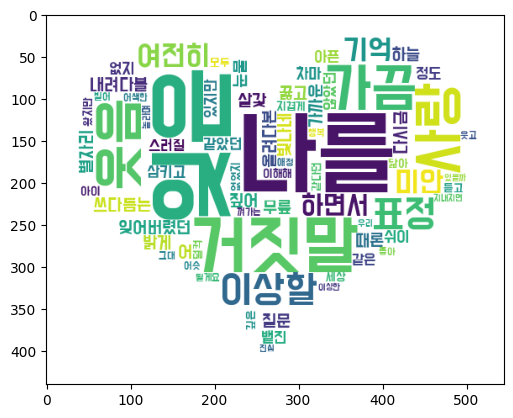

In [272]:
wc = WordCloud(background_color='white', font_path='../BMDOHYEON_ttf.ttf', mask = img)
cloud = wc.generate_from_frequencies(dic) # 워드 클라우드를 빈도를 기준으로 !
plt.imshow(cloud)
plt.show()

#### 빈도분석

In [273]:
from collections import Counter

result = Counter(total)
result

Counter({'미안': 1001,
         '여전히': 1001,
         '기억': 1001,
         '하면서': 1001,
         '잊어버렸던': 1001,
         '가끔': 2002,
         '무릎': 1001,
         '꿇고': 1001,
         '내려다볼': 1001,
         '쓰다듬는': 1001,
         '살갗': 1001,
         '됬어': 1001,
         '나를': 3003,
         '사랑': 2002,
         '질문': 1001,
         '때론': 1001,
         '가까운': 1001,
         '올려다본': 1001,
         '하늘': 1001,
         '짚어': 1001,
         '별자리': 1001,
         '밝게': 1001,
         '빛나네': 1001,
         '잊은': 3003,
         '다시금': 1001,
         '눈물': 1001,
         '삼키고': 1001,
         '있지만': 1001,
         '거짓말': 3003,
         '같았던': 1001,
         '웃음': 2002,
         '아픈': 1001,
         '없지': 1001,
         '이상할': 2002,
         '정도': 1001,
         '차마': 1001,
         '뱉진': 1001,
         '않았던': 1001,
         '쉬이': 1001,
         '스러질': 1001,
         '같은': 1001,
         '표정': 2002,
         '지겹게': 1001,
         '닮아': 1001,
         '덜컥': 1001,
         '세상': 1001,
         '듣

In [274]:
result.most_common(100)

[('나를', 3003),
 ('잊은', 3003),
 ('거짓말', 3003),
 ('가끔', 2002),
 ('사랑', 2002),
 ('웃음', 2002),
 ('이상할', 2002),
 ('표정', 2002),
 ('미안', 1001),
 ('여전히', 1001),
 ('기억', 1001),
 ('하면서', 1001),
 ('잊어버렸던', 1001),
 ('무릎', 1001),
 ('꿇고', 1001),
 ('내려다볼', 1001),
 ('쓰다듬는', 1001),
 ('살갗', 1001),
 ('됬어', 1001),
 ('질문', 1001),
 ('때론', 1001),
 ('가까운', 1001),
 ('올려다본', 1001),
 ('하늘', 1001),
 ('짚어', 1001),
 ('별자리', 1001),
 ('밝게', 1001),
 ('빛나네', 1001),
 ('다시금', 1001),
 ('눈물', 1001),
 ('삼키고', 1001),
 ('있지만', 1001),
 ('같았던', 1001),
 ('아픈', 1001),
 ('없지', 1001),
 ('정도', 1001),
 ('차마', 1001),
 ('뱉진', 1001),
 ('않았던', 1001),
 ('쉬이', 1001),
 ('스러질', 1001),
 ('같은', 1001),
 ('지겹게', 1001),
 ('닮아', 1001),
 ('덜컥', 1001),
 ('세상', 1001),
 ('듣고', 1001),
 ('이해해', 1001),
 ('왔지만', 1001),
 ('같다던', 1001),
 ('모두', 1001),
 ('없었지', 1001),
 ('깊은', 1001),
 ('아이', 1001),
 ('될게요', 1001),
 ('그대', 1001),
 ('행복', 1001),
 ('빌어', 1001),
 ('어슷', 1001),
 ('껴가는', 1001),
 ('어색한', 1001),
 ('애정', 1001),
 ('좋아', 1001),
 ('웃고', 1001),
 ('놀라며', 1